In [1]:
import pathlib
from ratdata import process
import numpy as np

In [2]:
datadir_gui = pathlib.Path('data/gui_recordings/')
amplitude_files = [f for f in datadir_gui.iterdir() if f.match('*-amplitude.txt') ]

In [4]:
infostring = 'Rat 1, files 6-9, 100 uA'
print(infostring)
rat1_mean = 0
rat1_p10_mean = 0
rat1_p20_mean = 0
rat1_all_amplitudes = []
for f in amplitude_files[5:9]:
    data = process.read_stim_amplitude_from_gui_recording(f, 100)
    rat1_all_amplitudes = np.append(rat1_all_amplitudes, data)
    mean_amplitude = np.mean(data)
    p10 = np.percentile(data, 10)
    p20 = np.percentile(data, 20)
    rat1_mean += mean_amplitude / 4
    rat1_p10_mean += p10 / 4
    rat1_p20_mean += p20 / 4
    print('%s: %.2f uA, p10: %.2f, p20: %.2f' % (f.name, mean_amplitude, p10, p20))
print('Rat 1 mean amplitude: %.2f uA, 10th percentile: %.2f, 20th percentile: %.2f' % (rat1_mean, rat1_p10_mean, rat1_p20_mean))
p10_all = np.percentile(rat1_all_amplitudes, 10)
p20_all = np.percentile(rat1_all_amplitudes, 20)
print('Percentiles from all recordings. P10: %.2f, P20: %.2f' % (p10_all, p20_all))

Rat 1, files 6-9, 100 uA
2022-03-04T08-40-48-amplitude.txt: 55.44 uA, p10: 25.00, p20: 31.25
2022-03-04T08-46-05-amplitude.txt: 53.38 uA, p10: 25.00, p20: 31.25
2022-03-04T08-59-15-amplitude.txt: 53.01 uA, p10: 18.75, p20: 25.00
2022-03-04T09-04-31-amplitude.txt: 55.65 uA, p10: 18.75, p20: 31.25
Rat 1 mean amplitude: 54.37 uA, 10th percentile: 21.88, 20th percentile: 29.69
Percentiles from all recordings. P10: 25.00, P20: 31.25


In [6]:
infostring = 'Rat 2, files 1-5, 40 uA'
print(infostring)
rat2_mean = 0
rat2_p10_mean = 0
rat2_p20_mean = 0
rat2_all_amplitudes = []
for f in amplitude_files[0:5]:
    data = process.read_stim_amplitude_from_gui_recording(f, 40)
    rat2_all_amplitudes = np.append(rat2_all_amplitudes, data)
    mean_amplitude = np.mean(data)
    p10 = np.percentile(data, 10)
    p20 = np.percentile(data, 20)
    rat2_mean += mean_amplitude / 5
    rat2_p10_mean += p10 / 5
    rat2_p20_mean += p20 / 5
    print('%s: %.2f uA, p10: %.2f, p20: %.2f' % (f.name, mean_amplitude, p10, p20))
print('Rat 2 mean amplitude: %.2f uA, 10th percentile: %.2f, 20th percentile: %.2f' % (rat2_mean, rat2_p10_mean, rat2_p20_mean))
rat2_p10_all = np.percentile(rat2_all_amplitudes, 10)
rat2_p20_all = np.percentile(rat2_all_amplitudes, 20)
print('Percentiles from all recordings. P10: %.2f, P20: %.2f' % (rat2_p10_all, rat2_p20_all))

Rat 2, files 1-5, 40 uA
2022-03-04T08-06-33-amplitude.txt: 33.31 uA, p10: 17.50, p20: 25.00
2022-03-04T08-12-01-amplitude.txt: 33.85 uA, p10: 17.50, p20: 25.00
2022-03-04T08-12-43-amplitude.txt: 34.26 uA, p10: 20.00, p20: 27.50
2022-03-04T08-25-07-amplitude.txt: 33.99 uA, p10: 20.00, p20: 25.00
2022-03-04T08-30-43-amplitude.txt: 34.59 uA, p10: 20.00, p20: 27.50
Rat 2 mean amplitude: 34.00 uA, 10th percentile: 19.00, 20th percentile: 26.00
Percentiles from all recordings. P10: 20.00, P20: 25.00


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plot_data = process.read_stim_amplitude_from_gui_recording(amplitude_files[0], 40)
p10 = process.calculate_percentile_stim_amplitude(amplitude_files[0], 40, 10)
p20 = process.calculate_percentile_stim_amplitude(amplitude_files[0], 40, 20)

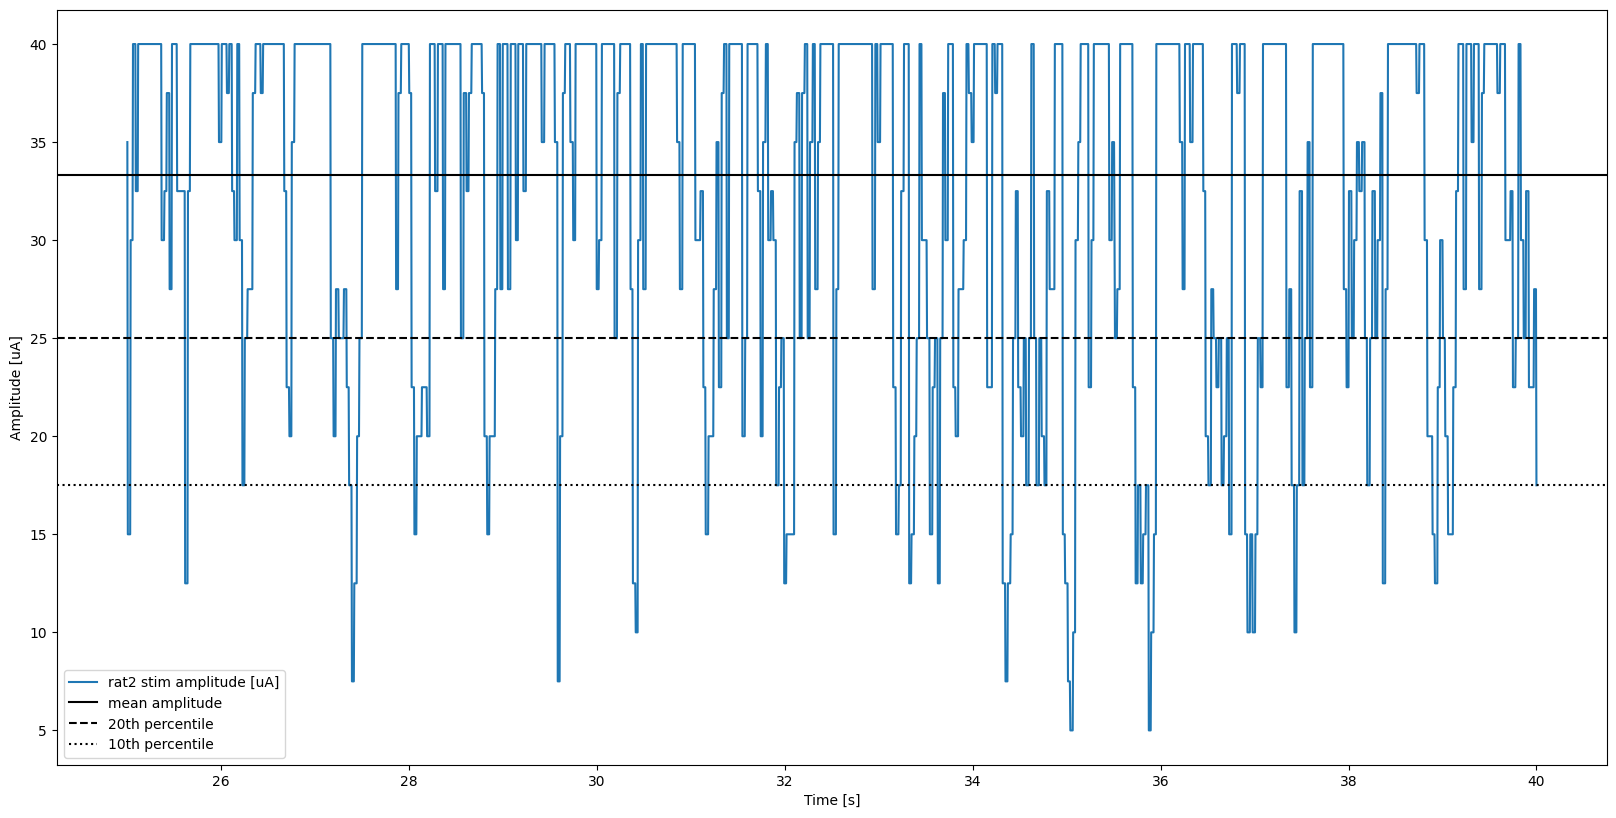

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)
tstart = 5000
tstop = 8000
ttn = tstop-tstart
plt.plot(np.linspace(tstart / 200, tstop / 200, ttn), plot_data[tstart:tstop])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uA]')
plt.axhline(np.mean(plot_data), linestyle='-', color='k')
plt.axhline(p20, linestyle='--', color='k')
plt.axhline(p10, linestyle=':', color='k')
plt.legend(['rat2 stim amplitude [uA]', 'mean amplitude', '20th percentile', '10th percentile'])

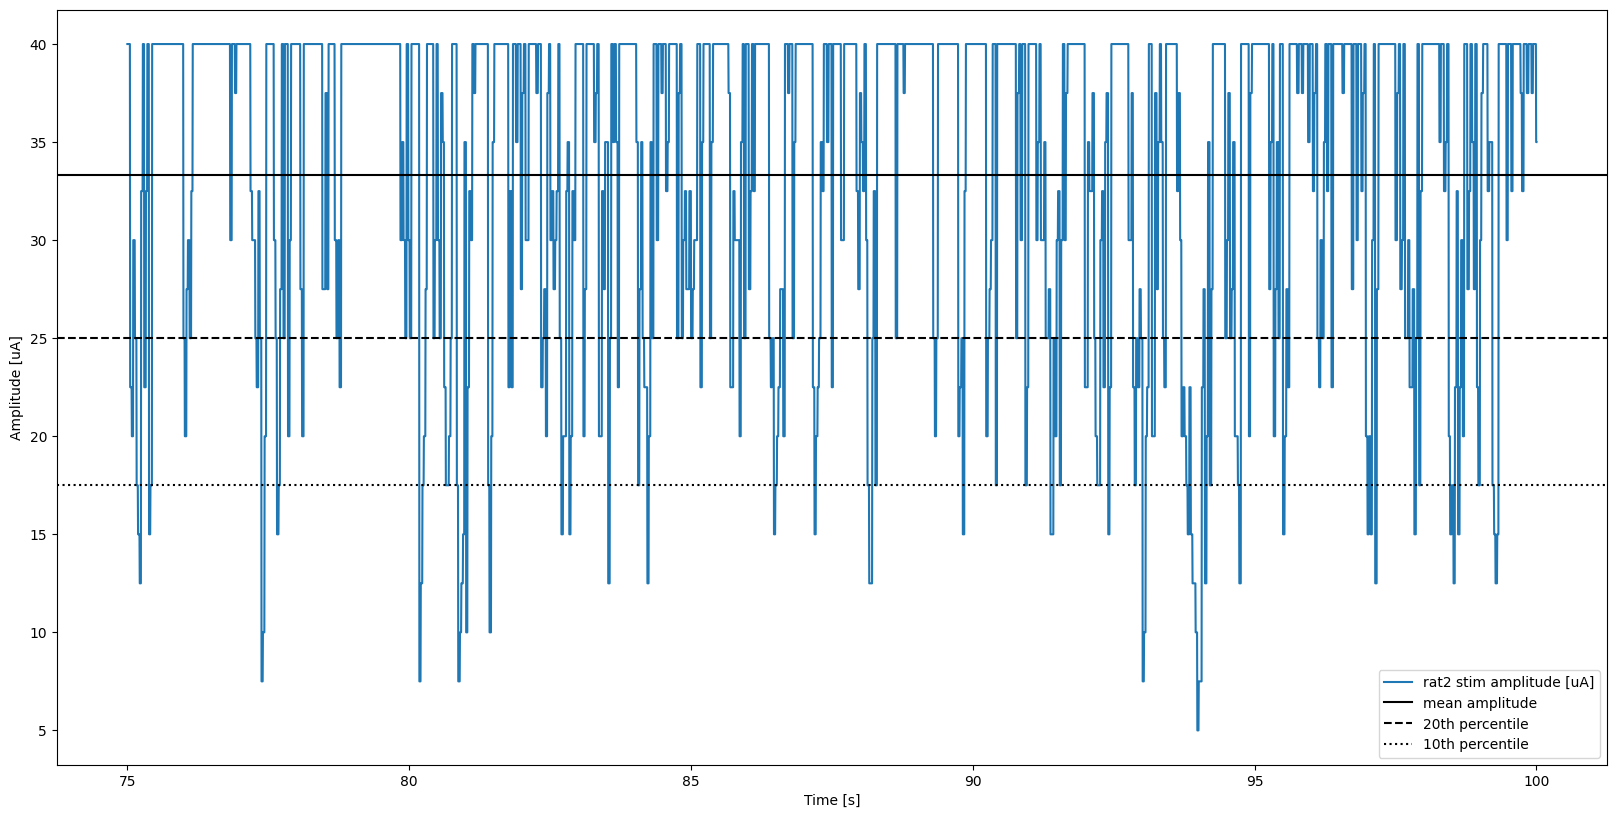

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)
tstart = 15000
tstop = 20000
ttn = tstop-tstart
plt.plot(np.linspace(tstart / 200, tstop / 200, ttn), plot_data[tstart:tstop])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uA]')
plt.axhline(np.mean(plot_data), linestyle='-', color='k')
plt.axhline(p20, linestyle='--', color='k')
plt.axhline(p10, linestyle=':', color='k')
plt.legend(['rat2 stim amplitude [uA]', 'mean amplitude', '20th percentile', '10th percentile'])

In [ ]:
plot_data_2 = process.read_stim_amplitude_from_gui_recording(amplitude_files[8], 100)
p10_2 = process.calculate_percentile_stim_amplitude(amplitude_files[8], 100, 10)
p20_2 = process.calculate_percentile_stim_amplitude(amplitude_files[8], 100, 20)

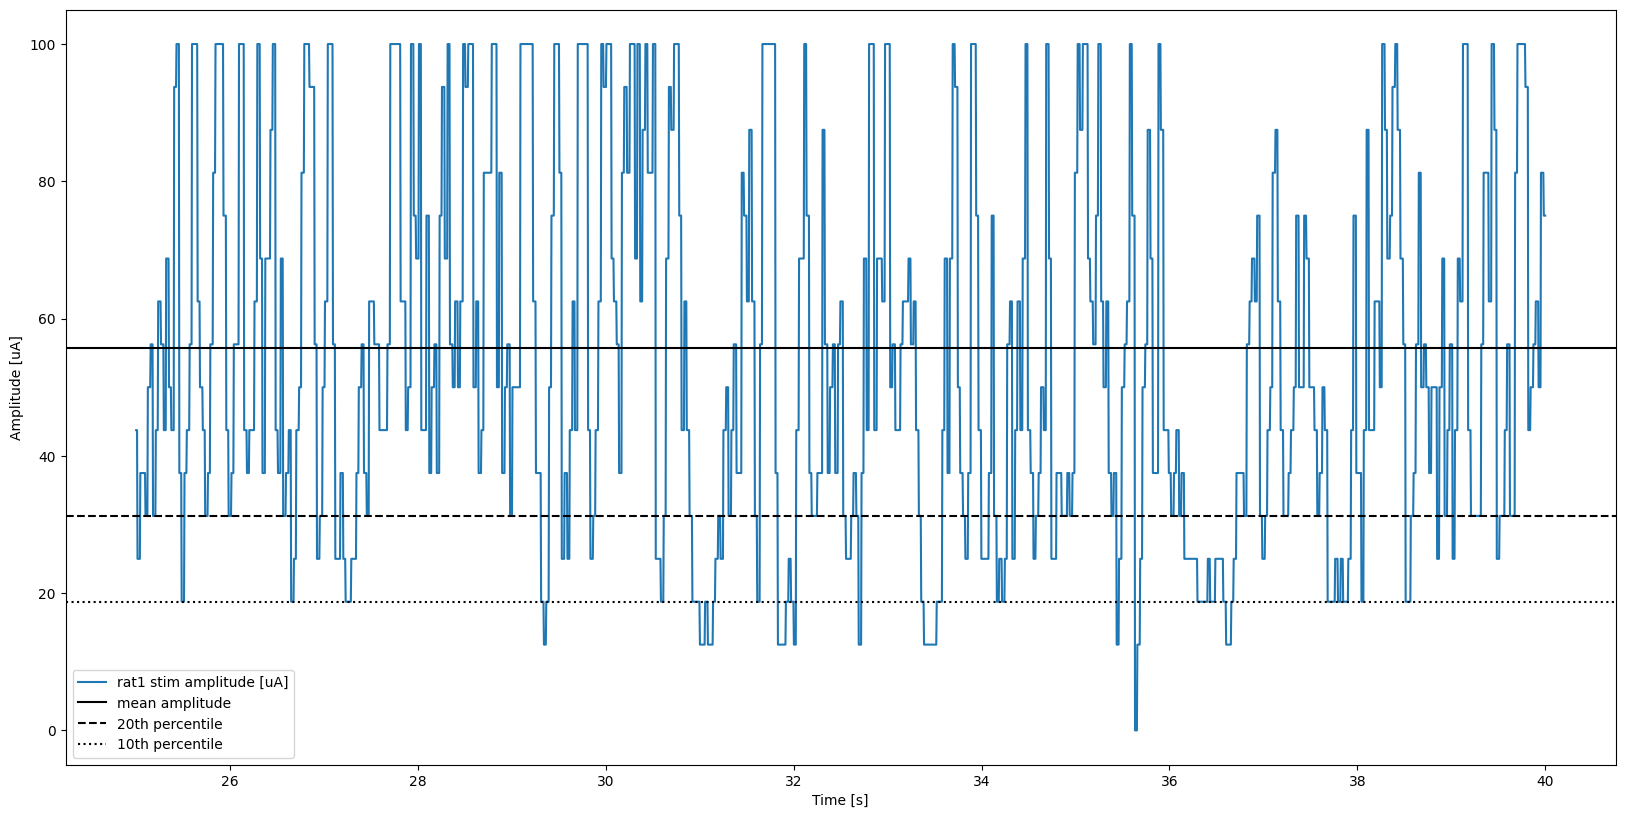

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)
tstart = 5000
tstop = 8000
ttn = tstop-tstart
plt.plot(np.linspace(tstart / 200, tstop / 200, ttn), plot_data_2[tstart:tstop])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uA]')
plt.axhline(np.mean(plot_data_2), linestyle='-', color='k')
plt.axhline(p20_2, linestyle='--', color='k')
plt.axhline(p10_2, linestyle=':', color='k')
plt.legend(['rat1 stim amplitude [uA]', 'mean amplitude', '20th percentile', '10th percentile'])

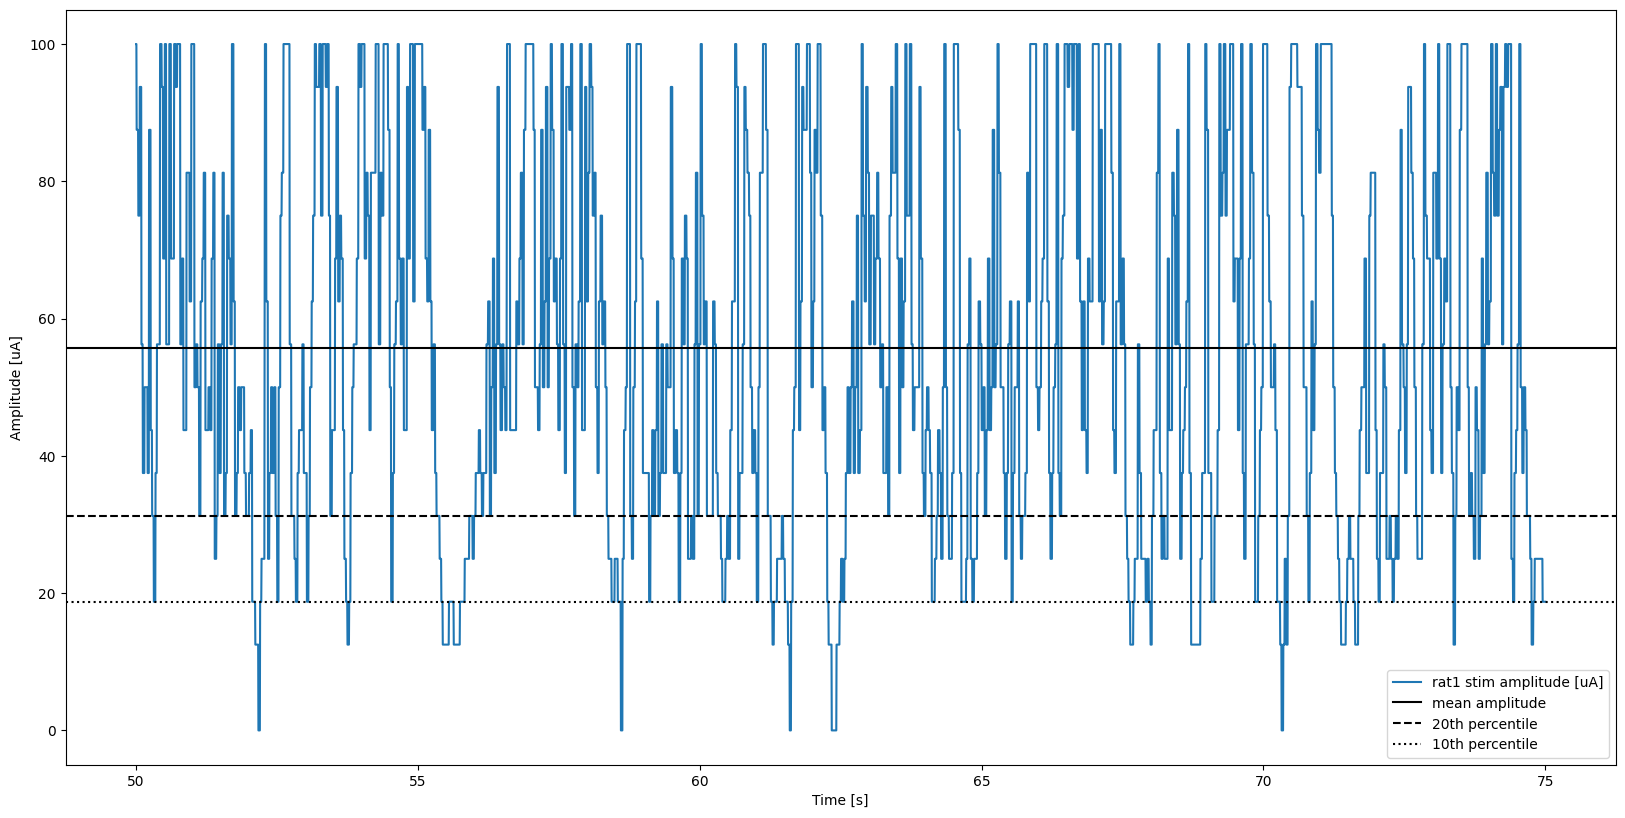

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)
tstart = 10000
tstop = 15000
ttn = tstop-tstart
plt.plot(np.linspace(tstart / 200, tstop / 200, ttn), plot_data_2[tstart:tstop])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uA]')
plt.axhline(np.mean(plot_data_2), linestyle='-', color='k')
plt.axhline(p20_2, linestyle='--', color='k')
plt.axhline(p10_2, linestyle=':', color='k')
plt.legend(['rat1 stim amplitude [uA]', 'mean amplitude', '20th percentile', '10th percentile'])